## 1) Import modules

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost

## 2) Load Data

In [2]:
# Reading the data
X = pd.read_csv('Cleaned Data/X.csv',  index_col='id')
Y = pd.read_csv('Cleaned Data/Y.csv',  index_col='id', squeeze=True) # squeezes DF into Series
X_test = pd.read_csv('Cleaned Data/X_test.csv',  index_col='id')

for data in [X,Y,X_test]:
    print('shape: ', data.shape)

shape:  (328, 278)
shape:  (328,)
shape:  (90, 278)


### Extracting only non-zero data

In [3]:
merged_df = pd.merge(X,Y,on='id')
merged_df = merged_df[merged_df['playtime_forever'] > 0]

X = merged_df.drop('playtime_forever',axis=1)
Y = merged_df['playtime_forever'].copy()

# print(Y.value_counts(normalize=True))
for data in [X,Y,X_test]:
    print('shape: ', data.shape)

shape:  (172, 278)
shape:  (172,)
shape:  (90, 278)


## 3) Splitting the dataset into Training set and Test set

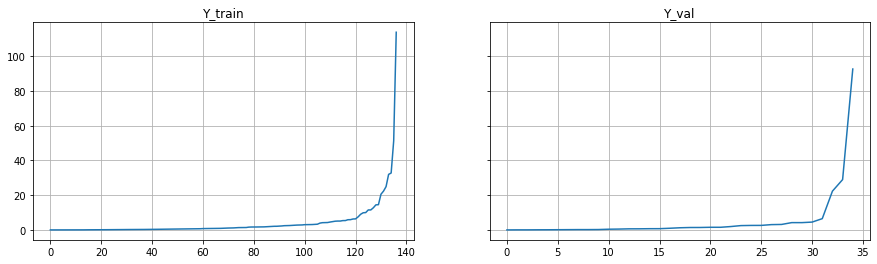

In [4]:
# Dataset split with stratification

X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=11112222)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
ax1.plot(np.sort(Y_train))
ax1.set_title('Y_train')
ax1.grid()

ax2.plot(np.sort(Y_val))
ax2.set_title('Y_val')
ax2.grid()

plt.show()

## 4) Feature Scaling: Normalization (Standardization)

In [5]:
# col_names = X.columns

# scaler = MinMaxScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=col_names)
# X_val = pd.DataFrame(scaler.transform(X_val), columns=col_names)

# scaler = MinMaxScaler()
# scaler.fit(X)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)



# scaler = StandardScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=col_names)
# X_val = pd.DataFrame(scaler.transform(X_val), columns=col_names)

# scaler = StandardScaler()
# scaler.fit(X)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=col_names)

# X_train.head()

## 5) Feature Selection

### 5.1) Filter Method

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k = 50
Kbestfeatures = SelectKBest(score_func=f_regression, k=k)
fit = Kbestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(k,'Score'))  #print K best features
best_features = featureScores.nlargest(k,'Score')['Specs'].tolist()


# featureScores = featureScores[featureScores['Score'] > 10]
# print(featureScores.sort_values(by=['Score'],ascending=False))
# best_features = featureScores['Specs'].tolist()

### 5.2)Select From Model

In [7]:
from sklearn.feature_selection import SelectFromModel

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=15)
embeded_rf_selector.fit(X, Y)

embeded_rf_support = embeded_rf_selector.get_support()
# best_features = X.loc[:,embeded_rf_support].columns.tolist()
# print(best_features)

In [8]:
X_train = X_train[best_features].copy()
X_val = X_val[best_features].copy()

X_test = X_test[best_features].copy()

X_train.head()

,tags_turn-based_tactics,tags_turn-based_combat,total_positive_reviews,total_negative_reviews,tags_crafting,tags_co-op,categories_co-op,tags_survival_horror,tags_open_world,tags_multiplayer,categories_full_controller_support,categories_local_multi-player,tags_crpg,categories_steam_workshop,tags_party-based_rpg,tags_rogue-like,categories_online_co-op,categories_multi-player,tags_sandbox,tags_online_co-op,tags_adventure,categories_local_co-op,genres_adventure,tags_survival,tags_atmospheric,purchase_date_timestamp,tags_isometric,tags_turn-based,tags_singleplayer,tags_character_customization,tags_vr,tags_rpg,genres_rpg,categories_cross-platform_multiplayer,categories_online_multi-player,categories_steam_trading_cards,tags_strategy,tags_2d,tags_alternate_history,purchase_date_year,tags_space,tags_action_rpg,tags_puzzle,date_diff,categories_shared/split_screen,tags_indie,tags_dark,tags_female_protagonist,categories_partial_controller_support,tags_casual
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
105,0,0,7.428927,5.981414,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.480291e+09,0,0,1,1,0,1,1,0,0,0,0,0,0,2016,0,1,0,1491,0,0,0,1,0,0
268,0,0,8.263333,5.808142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1.512691e+09,0,0,1,0,0,0,0,0,0,1,0,0,0,2017,0,0,0,407,0,1,0,0,0,0
141,0,0,8.170186,6.996681,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1.529539e+09,0,0,1,0,0,1,1,0,0,1,0,0,0,2018,0,0,0,1151,0,0,0,0,0,0
48,0,0,8.486940,4.941642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1.513210e+09,0,0,1,0,0,0,0,0,0,1,0,1,0,2017,0,0,1,0,0,1,0,0,0,1
259,0,0,8.463159,6.495266,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1.485130e+09,1,0,1,0,0,1,0,1,1,1,1,0,0,2017,0,0,0,662,0,1,0,0,0,0


## 6) Train ML Model

### 6.1) Comparative study of different models:

In [9]:
models = {}
# linear models
models['LinearRegression: '] = LinearRegression()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for a in alpha:
    models['Lasso-'+str(a)] = Lasso(alpha=a)
    models['Ridge-'+str(a)] = Ridge(alpha=a)
for a1 in alpha:
    for a2 in alpha:
        name = 'ElasticNet-' + str(a1) + ',' + str(a2)
        models[name] = ElasticNet(a1, a2)
models['HuberRegressor'] = HuberRegressor()
models['Lars'] = Lars()
models['LassoLars'] = LassoLars()
models['PassiveAggressiveRegressor'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
# models['RANSACRegressor'] = RANSACRegressor()
models['SGDRegressor'] = SGDRegressor(max_iter=1000, tol=1e-3)
models['TheilSenRegressor'] = TheilSenRegressor()

# non-linear models
n_neighbors = range(1, 21)
for k in n_neighbors:
    models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
models['DecisionTreeRegressor: '] = DecisionTreeRegressor()
models['ExtraTreeRegressor'] = ExtraTreeRegressor()
models['svml'] = SVR(kernel='linear')
models['svmp'] = SVR(kernel='poly')
c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for c in c_values:
    models['svmr-'+str(c)] = SVR(C=c)

# ensemble models
n_trees = 50
models['AdaBoostRegressor'] = AdaBoostRegressor(n_estimators=n_trees)
models['BaggingRegressor'] = BaggingRegressor(n_estimators=n_trees)
models['RandomForestRegressor'] = RandomForestRegressor(n_estimators=n_trees)
models['ExtraTreesRegressor'] = ExtraTreesRegressor(n_estimators=n_trees)
# models['GradientBoostingRegressor'] = GradientBoostingRegressor(n_estimators=n_trees)


min_result = 1000
filtered_models = {}
scoring = 'neg_mean_squared_error'
# print(scoring)
# print('------------------------')
# for name,model in models.items():
# #     kfold = StratifiedKFold(n_splits=10, random_state=42)
#     kfold = KFold(n_splits=10, shuffle = True, random_state=6)
#     result = cross_val_score(model, X[X_train.columns], Y, cv=kfold, scoring=scoring).mean()
#     print(name,result)
#     if int(abs(min_result)) < int(abs(result)):
#         min_result = result
#         filtered_models[name] = model

## 7) Fit & Evaluation

### 7.1) Model Evaluation tool

In [10]:
def eval_model(model,X,Y,data_name):
    Y = Y.values
    Y_predicted = model.predict(X)
    Y_predicted = Y_predicted - min(Y_predicted)
    rmse = np.sqrt(metrics.mean_squared_error(Y,Y_predicted))
    print('RMSE ('+data_name+'): ',rmse)

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4), sharey=True)
    y33 = Y[:int(0.34*len(Y))]
    y_pred33 = Y_predicted[:int(0.34*len(Y_predicted))]
    ax1.plot(y33, '-',label="Y")
    ax1.plot(y_pred33, '-',label="Y_pred")
    ax1.set_title('Y_train (34%): '+str(np.sqrt(metrics.mean_squared_error(y33,y_pred33))))

    y6 = Y[int(0.34*len(Y)):]
    y_pred6 = Y_predicted[int(0.34*len(Y_predicted)):]
    ax2.plot(y6, '-',label="Y")
    ax2.plot(y_pred6, '-',label="Y_pred")
    ax2.set_title('Y_test (66%):'+str(np.sqrt(metrics.mean_squared_error(y6,y_pred6))))

    plt.show()
    
    print('----------------------------------------------------------------------------------------------------')
    
    
def three_way_eval(model):
    model.fit(X_train,Y_train)
    eval_model(model,X_train,Y_train,'Train set')
    eval_model(model,X_val,Y_val,'Validation set')

    model.fit(X[X_test.columns],Y)
    eval_model(model,X[X_test.columns],Y,'Train & Test set')
    
    
def eval_rmse(model):
    model.fit(X_train,Y_train)
    Y_predicted = model.predict(X_train)
    rmse = np.sqrt(metrics.mean_squared_error(Y_train,Y_predicted))
    print('RMSE (Train set): ',rmse)
    
    Y_predicted = model.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(Y_val,Y_predicted))
    print('RMSE (Validation set): ',rmse)

    model.fit(X[X_test.columns],Y)
    Y_predicted = model.predict(X[X_test.columns])
    rmse = np.sqrt(metrics.mean_squared_error(Y,Y_predicted))
    print('RMSE (Full set): ',rmse)

RMSE (Train set):  10.154591242985965


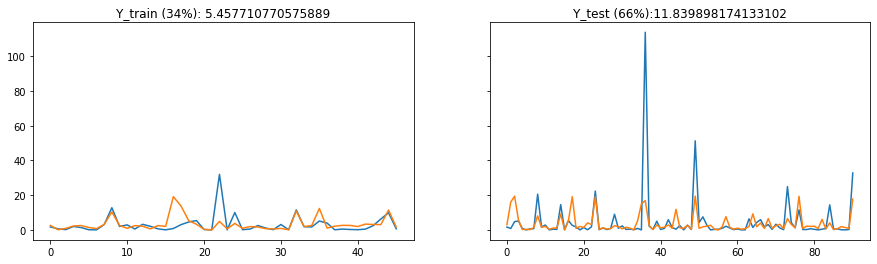

----------------------------------------------------------------------------------------------------
RMSE (Validation set):  15.826176315757168


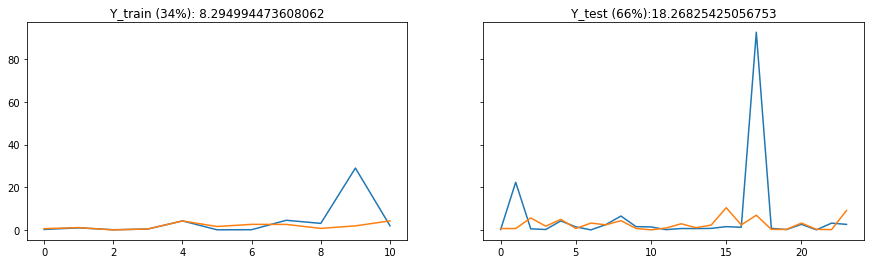

----------------------------------------------------------------------------------------------------
RMSE (Train & Test set):  10.915531036675466


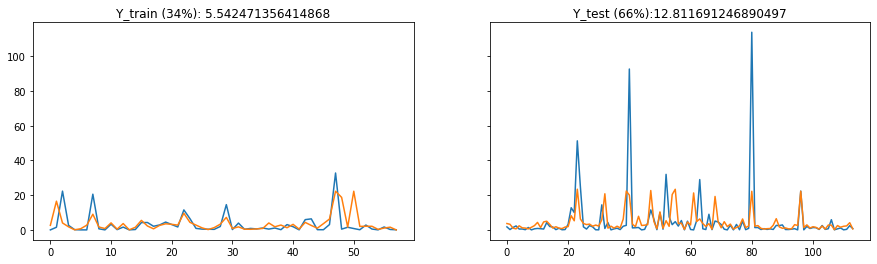

----------------------------------------------------------------------------------------------------


In [11]:
from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [20,30,40],
#     'max_features': [15, 35, 40,50],
#     'min_samples_leaf': [6,7],
#     'min_samples_split': [4,5,6],
#     'n_estimators': [300, 350, 400]
# }

# forest_reg = RandomForestRegressor()

# grid_search = GridSearchCV(estimator = forest_reg, param_grid = param_grid, scoring='neg_mean_squared_error', cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X[X_test.columns],Y)
# final_model = grid_search.best_estimator_
# print(final_model)


final_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=50, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

three_way_eval(final_model)

## 8) Prediction on given Test Data

In [12]:
final_model.fit(X[X_test.columns],Y)
actual_predicted = final_model.predict(X_test)
actual_predicted = actual_predicted - min(actual_predicted)

ind = [i for i in range(len(actual_predicted))]
predicted_df = pd.DataFrame(actual_predicted)
predicted_df.columns = ['playtime_forever']
predicted_df.index.name = 'id'
predicted_df[predicted_df['playtime_forever']<0] = 0

In [13]:
# predicted_df.to_csv('regression_result.csv')